In [1]:
# load libraries
import pandas as pd
import openpyxl
import geopandas as gpd

## Clean up data and merge dfs

In [2]:
# import election results for state senate district 9
district9_results = pd.read_excel('data/detail.xlsx', sheet_name='2', skiprows=1)

/Users/amahaja/GitHub/rehmet_election/.venv/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
# this spreadsheet has multi-level headers, so we'll need to address that
district9_results.head()

,Unnamed: 0,Unnamed: 1,Taylor Rehmet,Unnamed: 3,Unnamed: 4,Unnamed: 5,Leigh Wambsganss,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Precinct,Registered Voters,Absentee,Early,Election,Total Votes,Absentee,Early,Election,Total Votes,Total
1,1001,1940,3,99,98,200,1,43,45,89,289
2,1005,942,3,21,51,75,0,1,2,3,78
3,1008,314,1,12,24,37,0,0,6,6,43
4,1010,698,1,0,20,21,0,2,0,2,23


In [4]:
# rename columns to combine candidate names with vote types -- essentially flatten since there are multiple levels of headers
district9_results.columns = [
    'Precinct',
    'Registered_Voters',
    'Absentee_TaylorRehmet',
    'Early_TaylorRehmet',
    'Election_TaylorRehmet',
    'TotalVotes_TaylorRehmet',
    'Absentee_LeighWambsganss',
    'Early_LeighWambsganss',
    'Election_LeighWambsganss',
    'TotalVotes_LeighWambsganss',
    'TotalVotesAll'
]

# drop first row so we only have one row of headers
district9_results = district9_results.drop(0).reset_index(drop=True)

# make sure everything looks right
district9_results.head()

,Precinct,Registered_Voters,Absentee_TaylorRehmet,Early_TaylorRehmet,Election_TaylorRehmet,TotalVotes_TaylorRehmet,Absentee_LeighWambsganss,Early_LeighWambsganss,Election_LeighWambsganss,TotalVotes_LeighWambsganss,TotalVotesAll
0,1001,1940,3,99,98,200,1,43,45,89,289
1,1005,942,3,21,51,75,0,1,2,3,78
2,1008,314,1,12,24,37,0,0,6,6,43
3,1010,698,1,0,20,21,0,2,0,2,23
4,1011,1134,3,19,45,67,0,2,3,5,72


In [5]:
# there's a total row we don't want at the end, so let's drop that
district9_results.tail()

,Precinct,Registered_Voters,Absentee_TaylorRehmet,Early_TaylorRehmet,Election_TaylorRehmet,TotalVotes_TaylorRehmet,Absentee_LeighWambsganss,Early_LeighWambsganss,Election_LeighWambsganss,TotalVotes_LeighWambsganss,TotalVotesAll
376,4836,3126,10,76,123,209,4,67,56,127,336
377,4844,1820,2,40,73,115,0,29,44,73,188
378,4846,1720,3,49,39,91,2,16,33,51,142
379,4849,3336,1,83,137,221,0,39,81,120,341
380,Total:,617753,1115,24571,28594,54280,608,19375,20617,40600,94880


In [6]:
# drop last row
district9_results = district9_results.iloc[:-1].reset_index(drop=True)

In [7]:
# double check the bottom of the df looks good
district9_results.tail()

,Precinct,Registered_Voters,Absentee_TaylorRehmet,Early_TaylorRehmet,Election_TaylorRehmet,TotalVotes_TaylorRehmet,Absentee_LeighWambsganss,Early_LeighWambsganss,Election_LeighWambsganss,TotalVotes_LeighWambsganss,TotalVotesAll
375,4833,2116,2,78,114,194,1,100,108,209,403
376,4836,3126,10,76,123,209,4,67,56,127,336
377,4844,1820,2,40,73,115,0,29,44,73,188
378,4846,1720,3,49,39,91,2,16,33,51,142
379,4849,3336,1,83,137,221,0,39,81,120,341


In [8]:
# how many rows in the dataframe?
len(district9_results)

380

In [9]:
# verify types
district9_results.dtypes

Precinct                         str
Registered_Voters             object
Absentee_TaylorRehmet         object
Early_TaylorRehmet            object
Election_TaylorRehmet         object
TotalVotes_TaylorRehmet       object
Absentee_LeighWambsganss      object
Early_LeighWambsganss         object
Election_LeighWambsganss      object
TotalVotes_LeighWambsganss    object
TotalVotesAll                 object
dtype: object

In [10]:
# read in vtd census demographics data
vtd_census_2020 = pd.read_csv('data/vtd_census - VTDs_24PG_Pop.csv')

In [11]:
# this has demographics for all of the precincts in texas
len(vtd_census_2020)

9712

In [12]:
vtd_census_2020.dtypes

CountyFIPS    int64
County          str
CNTY          int64
VTD             str
CNTYVTD         str
VTDKEY        int64
total         int64
anglo         int64
nanglo        int64
asian         int64
black         int64
hisp          int64
bh            int64
vap           int64
anglovap      int64
nanglovap     int64
asianvap      int64
blackvap      int64
hispvap       int64
bhvap         int64
dtype: object

In [13]:
# ensure type is string so join works properly
vtd_census_2020['VTD'] = vtd_census_2020['VTD'].astype(str)

In [14]:
# we're lucky that all of district 9 is in tarrant county, so can filter to just that
vtd_census_tarrant = vtd_census_2020[vtd_census_2020['County'] == 'TARRANT']

In [15]:
vtd_census_tarrant.duplicated(subset=['VTD']).sum()

np.int64(0)

In [16]:
# let's aggregate the demographics across precincts with A and B suffixes

# create base column that strips the A/B suffix
vtd_census_tarrant['VTD_base'] = vtd_census_tarrant['VTD'].str.rstrip('AB')

# identify which VTDs we are adding combined
combined_vtds = vtd_census_tarrant.groupby('VTD_base').filter(lambda x: len(x) > 1)
if len(combined_vtds) > 0:
    print("VTDs that will be combined:")
    for base_vtd in combined_vtds['VTD_base'].unique():
        variants = vtd_census_tarrant[vtd_census_tarrant['VTD_base'] == base_vtd]['VTD'].tolist()
        print(f"  {base_vtd}: {', '.join(variants)}")
    print()

# specify which columns to sum when combining A and B precincts
cols_to_add = ['total',
               'anglo',
               'nanglo',
               'asian',
               'black',
               'hisp',
               'bh',
               'vap',
               'anglovap',
               'nanglovap',
               'asianvap',
               'blackvap',
               'hispvap',
               'bhvap']

# we want to group by the stripped VTD name and sum specified columns, keep first value for others
agg_dict = {col: 'sum' if col in cols_to_add else 'first' 
            for col in vtd_census_tarrant.columns if col not in ['VTD', 'VTD_base']}

vtd_census_combined = vtd_census_tarrant.groupby('VTD_base', as_index=False).agg(agg_dict)

# rename VTD_base back to VTD
vtd_census_combined.rename(columns={'VTD_base': 'VTD'}, inplace=True)

print(f"Original Tarrant VTDs: {len(vtd_census_tarrant)}")
print(f"Combined VTDs: {len(vtd_census_combined)}")

VTDs that will be combined:
  2827: 2827A, 2827B
  3325: 3325A, 3325B
  4245: 4245A, 4245B
  4737: 4737A, 4737B
  4846: 4846A, 4846B

Original Tarrant VTDs: 782
Combined VTDs: 777


In [17]:
# join both data frames on Precinct and VTD
# the key to join is NOT vtdkey -- values for that are as low as 1. there's no precinct 1 in district 9

merged_df = pd.merge(district9_results, vtd_census_combined, left_on='Precinct', right_on='VTD', how='inner')

In [18]:
# are there any duplicate precincts now?
merged_df.duplicated(subset=['Precinct']).sum()

np.int64(0)

In [19]:
# how many precincts are missing?
len(merged_df)

378

In [20]:
# show precincts that are in in district9_results but not in merged_df
precincts_in_original = set(district9_results['Precinct'])
precincts_in_merged = set(merged_df['Precinct'])
missing_precincts = precincts_in_original - precincts_in_merged

print(f"Precincts not in merged: {len(missing_precincts)}")
if missing_precincts:
    print("Missing precincts:")
    for p in missing_precincts:
        print(f"{p}")



Precincts not in merged: 2
Missing precincts:
1823
4598


In [21]:
# check if these missing precincts are in original vtd_census_2020 data
for precinct in missing_precincts:
    match = vtd_census_2020[vtd_census_2020['VTD'] == precinct]
    if len(match) > 0:
        print(f"Precinct {precinct} found in vtd_census_2020:")
        print(f"  Counties: {match['County'].unique().tolist()}")
    else:
        print(f"Precinct {precinct} not in vtd_census_2020")

Precinct 1823 not in vtd_census_2020
Precinct 4598 not in vtd_census_2020


In [22]:
# see these rows in the election results data 
# each of them have zero total votes
district9_results[district9_results['Precinct'].isin(['1823', '4598'])]

,Precinct,Registered_Voters,Absentee_TaylorRehmet,Early_TaylorRehmet,Election_TaylorRehmet,TotalVotes_TaylorRehmet,Absentee_LeighWambsganss,Early_LeighWambsganss,Election_LeighWambsganss,TotalVotes_LeighWambsganss,TotalVotesAll
75,1823,0,0,0,0,0,0,0,0,0,0
339,4598,0,0,0,0,0,0,0,0,0,0


In [23]:
# were there other precincts with zero total votes?
# this is weird because there are others with no votes but they still show up
district9_results[district9_results['TotalVotesAll'] == 0]

,Precinct,Registered_Voters,Absentee_TaylorRehmet,Early_TaylorRehmet,Election_TaylorRehmet,TotalVotes_TaylorRehmet,Absentee_LeighWambsganss,Early_LeighWambsganss,Election_LeighWambsganss,TotalVotes_LeighWambsganss,TotalVotesAll
11,1064,0,0,0,0,0,0,0,0,0,0
38,1420,0,0,0,0,0,0,0,0,0,0
40,1434,0,0,0,0,0,0,0,0,0,0
42,1455,0,0,0,0,0,0,0,0,0,0
43,1457,2,0,0,0,0,0,0,0,0,0
49,1491,5,0,0,0,0,0,0,0,0,0
50,1544,11,0,0,0,0,0,0,0,0,0
51,1547,0,0,0,0,0,0,0,0,0,0
52,1549,0,0,0,0,0,0,0,0,0,0
54,1586,11,0,0,0,0,0,0,0,0,0


In [24]:
# check for nas
merged_df.isna().sum()

Precinct                      0
Registered_Voters             0
Absentee_TaylorRehmet         0
Early_TaylorRehmet            0
Election_TaylorRehmet         0
TotalVotes_TaylorRehmet       0
Absentee_LeighWambsganss      0
Early_LeighWambsganss         0
Election_LeighWambsganss      0
TotalVotes_LeighWambsganss    0
TotalVotesAll                 0
VTD                           0
CountyFIPS                    0
County                        0
CNTY                          0
CNTYVTD                       0
VTDKEY                        0
total                         0
anglo                         0
nanglo                        0
asian                         0
black                         0
hisp                          0
bh                            0
vap                           0
anglovap                      0
nanglovap                     0
asianvap                      0
blackvap                      0
hispvap                       0
bhvap                         0
dtype: i

In [25]:
# export csv
merged_df.to_csv('district9_election_census_2020.csv', index=False)

In [26]:
merged_df.columns


Index(['Precinct', 'Registered_Voters', 'Absentee_TaylorRehmet',
       'Early_TaylorRehmet', 'Election_TaylorRehmet',
       'TotalVotes_TaylorRehmet', 'Absentee_LeighWambsganss',
       'Early_LeighWambsganss', 'Election_LeighWambsganss',
       'TotalVotes_LeighWambsganss', 'TotalVotesAll', 'VTD', 'CountyFIPS',
       'County', 'CNTY', 'CNTYVTD', 'VTDKEY', 'total', 'anglo', 'nanglo',
       'asian', 'black', 'hisp', 'bh', 'vap', 'anglovap', 'nanglovap',
       'asianvap', 'blackvap', 'hispvap', 'bhvap'],
      dtype='str')

In [27]:
merged_df.dtypes

Precinct                         str
Registered_Voters             object
Absentee_TaylorRehmet         object
Early_TaylorRehmet            object
Election_TaylorRehmet         object
TotalVotes_TaylorRehmet       object
Absentee_LeighWambsganss      object
Early_LeighWambsganss         object
Election_LeighWambsganss      object
TotalVotes_LeighWambsganss    object
TotalVotesAll                 object
VTD                              str
CountyFIPS                     int64
County                           str
CNTY                           int64
CNTYVTD                          str
VTDKEY                         int64
total                          int64
anglo                          int64
nanglo                         int64
asian                          int64
black                          int64
hisp                           int64
bh                             int64
vap                            int64
anglovap                       int64
nanglovap                      int64
a

In [28]:
# create a column showing who won each precinct
merged_df['Winner'] = merged_df.apply(
    lambda row: 'Taylor Rehmet' if row['TotalVotes_TaylorRehmet'] > row['TotalVotes_LeighWambsganss']
    else ('Tie' if row['TotalVotes_TaylorRehmet'] == row['TotalVotes_LeighWambsganss']
    else 'Leigh Wambsganss'), 
    axis=1
)

In [29]:
# calculcate pct of votes each candidate received in each precinct
# keep zero-vote precincts and avoid division-by-zero
denom = merged_df['TotalVotesAll'].replace(0, pd.NA)
merged_df['Rehmet_Pct'] = ((merged_df['TotalVotes_TaylorRehmet'] / denom) * 100).fillna(0)
merged_df['Wambsganss_Pct'] = ((merged_df['TotalVotes_LeighWambsganss'] / denom) * 100).fillna(0)



# Load 2022 District 9 results

In [30]:

# read in 2022 precinct-level results from sheet 23
# file is actually XML-formatted Excel, not a true .xlsx
import xml.etree.ElementTree as ET

# Parse the XML file
tree = ET.parse('data/2022_precinct_results.xlsx')
root = tree.getroot()

# Define namespaces
ns = {
    'ss': 'urn:schemas-microsoft-com:office:spreadsheet',
    's': 'urn:schemas-microsoft-com:office:spreadsheet'
}

# Find all sheets
sheets = root.findall('.//ss:Worksheet', ns)
print(f"Total sheets found: {len(sheets)}")

# Get sheet 23 (0-indexed, so sheet 23 is at index 23)
if len(sheets) > 23:
    sheet23 = sheets[23]
    
    # Extract data from sheet 23
    rows = []
    for row in sheet23.findall('ss:Table/ss:Row', ns):
        cells = []
        for cell in row.findall('ss:Cell', ns):
            data = cell.find('ss:Data', ns)
            cells.append(data.text if data is not None else '')
        if cells:
            rows.append(cells)
    
    # Ensure all rows have the same length
    if rows:
        max_cols = max(len(row) for row in rows)
        rows = [row + [''] * (max_cols - len(row)) for row in rows]
        
        # Create DataFrame
        if len(rows) > 1:
            district9_results_2022 = pd.DataFrame(rows[1:], columns=rows[0])
        else:
            district9_results_2022 = pd.DataFrame(rows)
else:
    print(f"Sheet 23 not found (only {len(sheets)} sheets available)")



Total sheets found: 64


In [31]:
# nice, we got the right race. same issue as before with multiple levels of headers
district9_results_2022

,"State Senator, District 9 (Vote For 1)",,,,,,,,,,
0,NaN,NaN,Kelly Hancock,Gwenn Burud,NaN,,,,,,
1,Precinct,Registered Voters,Absentee,Early,Election,Total Votes,Absentee,Early,Election,Total Votes,Total
2,1001,1874,8,309,147,464,19,333,126,478,942
3,1005,818,0,7,7,14,8,153,87,248,262
4,1008,303,0,3,13,16,2,52,35,89,105
...,...,...,...,...,...,...,...,...,...,...,...
364,4733,2135,8,237,228,473,6,276,186,468,941
365,4736,1994,19,448,214,681,14,144,66,224,905
366,4737,1756,11,269,132,412,11,224,92,327,739
367,4820,0,0,0,0,0,0,0,0,0,0


In [32]:
district9_results_2022.columns = [
    'Precinct',
    'Registered_Voters',
    'Absentee_KellyHancock',
    'Early_KellyHancock',
    'Election_KellyHancock',
    'TotalVotes_KellyHancock',
    'Absentee_GwennBurud',
    'Early_GwennBurud',
    'Election_GwennBurud',
    'TotalVotes_GwennBurud',
    'TotalVotesAll'
]

# drop first row so we only have one row of headers
district9_results_2022 = district9_results_2022.drop([0,1]).reset_index(drop=True)

# make sure everything looks right
district9_results_2022.head(5)

,Precinct,Registered_Voters,Absentee_KellyHancock,Early_KellyHancock,Election_KellyHancock,TotalVotes_KellyHancock,Absentee_GwennBurud,Early_GwennBurud,Election_GwennBurud,TotalVotes_GwennBurud,TotalVotesAll
0,1001,1874,8,309,147,464,19,333,126,478,942
1,1005,818,0,7,7,14,8,153,87,248,262
2,1008,303,0,3,13,16,2,52,35,89,105
3,1010,486,0,15,16,31,1,37,33,71,102
4,1011,1107,0,19,14,33,9,117,90,216,249


In [33]:
district9_results_2022.tail(5)

,Precinct,Registered_Voters,Absentee_KellyHancock,Early_KellyHancock,Election_KellyHancock,TotalVotes_KellyHancock,Absentee_GwennBurud,Early_GwennBurud,Election_GwennBurud,TotalVotes_GwennBurud,TotalVotesAll
362,4733,2135,8,237,228,473,6,276,186,468,941
363,4736,1994,19,448,214,681,14,144,66,224,905
364,4737,1756,11,269,132,412,11,224,92,327,739
365,4820,0,0,0,0,0,0,0,0,0,0
366,Total:,589624,4276,110655,51933,166864,4787,73432,32800,111019,277883


In [34]:
# drop last row with totals
district9_results_2022 = district9_results_2022.iloc[:-1].reset_index(drop=True)

In [35]:
district9_results_2022.tail(5)

,Precinct,Registered_Voters,Absentee_KellyHancock,Early_KellyHancock,Election_KellyHancock,TotalVotes_KellyHancock,Absentee_GwennBurud,Early_GwennBurud,Election_GwennBurud,TotalVotes_GwennBurud,TotalVotesAll
361,4730,3318,32,695,312,1039,15,407,188,610,1649
362,4733,2135,8,237,228,473,6,276,186,468,941
363,4736,1994,19,448,214,681,14,144,66,224,905
364,4737,1756,11,269,132,412,11,224,92,327,739
365,4820,0,0,0,0,0,0,0,0,0,0


In [36]:
district9_results_2022.dtypes

Precinct                   str
Registered_Voters          str
Absentee_KellyHancock      str
Early_KellyHancock         str
Election_KellyHancock      str
TotalVotes_KellyHancock    str
Absentee_GwennBurud        str
Early_GwennBurud           str
Election_GwennBurud        str
TotalVotes_GwennBurud      str
TotalVotesAll              str
dtype: object

In [37]:
# change numeric columns to numeric types
numeric_cols = [
    'Registered_Voters',
    'Absentee_KellyHancock',
    'Early_KellyHancock',       
    'Election_KellyHancock',
    'TotalVotes_KellyHancock',
    'Absentee_GwennBurud',
    'Early_GwennBurud',
    'Election_GwennBurud',
    'TotalVotes_GwennBurud',
    'TotalVotesAll'
]   

for col in numeric_cols:
    district9_results_2022[col] = pd.to_numeric(district9_results_2022[col], errors='coerce')

In [38]:
# create columns for vote percent
district9_results_2022['Hancock_Pct']  = (district9_results_2022['TotalVotes_KellyHancock'] / district9_results_2022['TotalVotesAll']) * 100
district9_results_2022['Burud_Pct']  = (district9_results_2022['TotalVotes_GwennBurud'] / district9_results_2022['TotalVotesAll']) * 100

In [39]:
len(district9_results_2022)

366

In [40]:
# what precincts are in 2026 but not 2022? 
precincts_2026 = set(merged_df['Precinct'])
precincts_2022 = set(district9_results_2022['Precinct'])
precincts_only_2026 = precincts_2026 - precincts_2022
precincts_only_2026

{'1834',
 '1845',
 '3841',
 '3842',
 '3847',
 '3850',
 '4829',
 '4830',
 '4832',
 '4833',
 '4836',
 '4844',
 '4846',
 '4849'}

In [41]:
vote_shift = pd.merge(merged_df, district9_results_2022, on='Precinct', how='inner')


In [42]:
vote_shift

,Precinct,Registered_Voters_x,Absentee_TaylorRehmet,Early_TaylorRehmet,Election_TaylorRehmet,TotalVotes_TaylorRehmet,Absentee_LeighWambsganss,Early_LeighWambsganss,Election_LeighWambsganss,TotalVotes_LeighWambsganss,...,Early_KellyHancock,Election_KellyHancock,TotalVotes_KellyHancock,Absentee_GwennBurud,Early_GwennBurud,Election_GwennBurud,TotalVotes_GwennBurud,TotalVotesAll_y,Hancock_Pct,Burud_Pct
0,1001,1940,3,99,98,200,1,43,45,89,...,309,147,464,19,333,126,478,942,49.256900,50.743100
1,1005,942,3,21,51,75,0,1,2,3,...,7,7,14,8,153,87,248,262,5.343511,94.656489
2,1008,314,1,12,24,37,0,0,6,6,...,3,13,16,2,52,35,89,105,15.238095,84.761905
3,1010,698,1,0,20,21,0,2,0,2,...,15,16,31,1,37,33,71,102,30.392157,69.607843
4,1011,1134,3,19,45,67,0,2,3,5,...,19,14,33,9,117,90,216,249,13.253012,86.746988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,4730,4035,5,135,192,332,8,132,169,309,...,695,312,1039,15,407,188,610,1649,63.007884,36.992116
360,4733,2552,3,72,104,179,3,42,59,104,...,237,228,473,6,276,186,468,941,50.265675,49.734325
361,4736,2215,1,44,59,104,3,88,98,189,...,448,214,681,14,144,66,224,905,75.248619,24.751381
362,4737,1873,0,66,83,149,2,52,45,99,...,269,132,412,11,224,92,327,739,55.751015,44.248985


2022: Kelly Hancock (R) vs. Gwenn Burud (D)
2024: Leigh Wambsganss (R) vs. Taylor Rehmet (D)

In [43]:

# calculate vote shift from 2022 to 2024
# margins calculated as Democrat - Republican (so positive = Dem advantage, negative = GOP advantage)
vote_shift['Margin_2026'] = vote_shift['Rehmet_Pct'] - vote_shift['Wambsganss_Pct']
vote_shift['Margin_2022'] = vote_shift['Burud_Pct'] - vote_shift['Hancock_Pct']

# calculate the shift in Democratic margin from 2022 to 2024 (positive = shift toward Dem, negative = shift toward GOP)
vote_shift['Margin_Shift'] = vote_shift['Margin_2026'] - vote_shift['Margin_2022']

# calculate percentage point difference in Democratic vote share: Rehmet (2026) vs Burud (2022)
vote_shift['Dem_Vote_Change'] = vote_shift['Rehmet_Pct'] - vote_shift['Burud_Pct']

# view precincts with the largest shifts
vote_shift[['Precinct', 'Burud_Pct', 'Rehmet_Pct', 'Dem_Vote_Change', 'Margin_2022', 'Margin_2026', 'Margin_Shift']].sort_values('Dem_Vote_Change', ascending=False)

# export to csv
vote_shift.to_csv('vote_shift_2022_2026.csv', index=False)


In [44]:
# Create mapping-ready dataframe with shift direction
vote_shift_map = vote_shift[['Precinct', 'Burud_Pct', 'Rehmet_Pct', 'Dem_Vote_Change', 
                             'Hancock_Pct', 'Wambsganss_Pct', 'Margin_2022', 'Margin_2026', 
                             'Margin_Shift', 'hisp', 'nanglo', 'total']].copy()

# Calculate demographics percentages
vote_shift_map['pct_hisp'] = vote_shift_map['hisp'] / vote_shift_map['total']
vote_shift_map['pct_nonwhite'] = vote_shift_map['nanglo'] / vote_shift_map['total']

# Add categorical column for shift direction
vote_shift_map['Shift_Direction'] = vote_shift_map['Dem_Vote_Change'].apply(
    lambda x: 'Shift to Democrats' if x > 0 else ('No Change' if x == 0 else 'Shift to Republicans')
)

# Add numeric representation of shift direction (-1 = GOP, 0 = No Change, 1 = Dem)
vote_shift_map['Shift_Code'] = vote_shift_map['Dem_Vote_Change'].apply(
    lambda x: 1 if x > 0 else (0 if x == 0 else -1)
)

print(f"Precincts for mapping: {len(vote_shift_map)}")
print("\nShift direction breakdown:")
print(vote_shift_map['Shift_Direction'].value_counts())
print("\nShift code: 1 = Dem, 0 = No Change, -1 = GOP")

vote_shift_map.head()

Precincts for mapping: 364

Shift direction breakdown:
Shift_Direction
Shift to Democrats      301
Shift to Republicans     55
No Change                 8
Name: count, dtype: int64

Shift code: 1 = Dem, 0 = No Change, -1 = GOP


,Precinct,Burud_Pct,Rehmet_Pct,Dem_Vote_Change,Hancock_Pct,Wambsganss_Pct,Margin_2022,Margin_2026,Margin_Shift,hisp,nanglo,total,pct_hisp,pct_nonwhite,Shift_Direction,Shift_Code
0,1001,50.743100,69.204152,18.461052,49.256900,30.795848,1.486200,38.408304,36.922105,341,873,2240,0.152232,0.389732,Shift to Democrats,1
1,1005,94.656489,96.153846,1.497358,5.343511,3.846154,89.312977,92.307692,2.994715,595,1406,1471,0.404487,0.955812,Shift to Democrats,1
2,1008,84.761905,86.046512,1.284607,15.238095,13.953488,69.523810,72.093023,2.569214,356,549,589,0.604414,0.932088,Shift to Democrats,1
3,1010,69.607843,91.304348,21.696505,30.392157,8.695652,39.215686,82.608696,43.393009,704,1153,1424,0.494382,0.809691,Shift to Democrats,1
4,1011,86.746988,93.055556,6.308568,13.253012,6.944444,73.493976,86.111111,12.617135,2422,2964,3175,0.762835,0.933543,Shift to Democrats,1


In [45]:
# Export for external mapping tools
vote_shift_map.to_csv('vote_shift_map_2022_2026.csv', index=False)
print("Exported vote_shift_map_2022_2026.csv for mapping")

Exported vote_shift_map_2022_2026.csv for mapping


In [46]:
rehmet_wins = merged_df[merged_df['Winner'] == 'Taylor Rehmet']
wambsganss_wins = merged_df[merged_df['Winner'] == 'Leigh Wambsganns']

In [47]:
# make col for percentage hispanic in each precinct
merged_df['pct_hisp'] = merged_df['hisp'] / merged_df['total']

In [48]:
# see which precincts are majority hispanic
majority_hispanic = merged_df[merged_df['pct_hisp'] > 0.5]

In [49]:
# 63 precincts are majority hispanic
majority_hispanic

,Precinct,Registered_Voters,Absentee_TaylorRehmet,Early_TaylorRehmet,Election_TaylorRehmet,TotalVotes_TaylorRehmet,Absentee_LeighWambsganss,Early_LeighWambsganss,Election_LeighWambsganss,TotalVotes_LeighWambsganss,...,anglovap,nanglovap,asianvap,blackvap,hispvap,bhvap,Winner,Rehmet_Pct,Wambsganss_Pct,pct_hisp
2,1008,314,1,12,24,37,0,0,6,6,...,38,383,7,147,227,371,Taylor Rehmet,86.046512,13.953488,0.604414
4,1011,1134,3,19,45,67,0,2,3,5,...,195,2060,51,370,1634,1999,Taylor Rehmet,93.055556,6.944444,0.762835
5,1015,1188,3,68,72,143,0,3,15,18,...,623,1064,60,83,900,976,Taylor Rehmet,88.819876,11.180124,0.564757
6,1019,798,1,9,47,57,0,1,5,6,...,224,1300,14,166,1110,1264,Taylor Rehmet,90.47619,9.52381,0.771970
12,1066,985,2,29,49,80,0,5,14,19,...,452,1324,55,381,879,1244,Taylor Rehmet,80.808081,19.191919,0.560147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,4620,81,0,2,0,2,0,0,0,0,...,85,279,9,32,233,263,Taylor Rehmet,100.0,0.0,0.678899
351,4682,439,1,11,16,28,2,5,1,8,...,141,579,40,7,532,539,Taylor Rehmet,77.777778,22.222222,0.790882
353,4685,6,0,0,2,2,0,0,0,0,...,1,7,0,2,5,7,Taylor Rehmet,100.0,0.0,0.722222
355,4687,260,0,8,9,17,1,0,0,1,...,114,400,2,3,392,394,Taylor Rehmet,94.444444,5.555556,0.776848


In [50]:
len(majority_hispanic)


66

In [51]:
majority_hispanic.groupby('Winner').size()

Winner
Leigh Wambsganss     3
Taylor Rehmet       59
Tie                  4
dtype: int64

In [52]:
# export majority hispanic 
majority_hispanic.to_csv('majority_hispanic_precincts.csv', index=False)

In [53]:
# what about in majority non-white precincts?
merged_df['pct_nonwhite'] = merged_df['nanglo'] / merged_df['total']

In [54]:
# create mask for nonwhite
majority_nonwhite = merged_df[merged_df['pct_nonwhite'] > 0.5]

In [55]:
# calculate vote shares and margins for majority nonwhite precincts
majority_nonwhite[['Precinct', 'Winner', 'Rehmet_Pct', 'Wambsganss_Pct', 'Vote_Margin_Pct']]

KeyError: "['Vote_Margin_Pct'] not in index"

In [ ]:
majority_nonwhite.groupby('Winner').size()

Winner
Leigh Wambsganss      8
Taylor Rehmet       133
Tie                   2
dtype: int64

In [ ]:
len(majority_nonwhite)

143

In [ ]:
# export majority nonwhite
majority_nonwhite.to_csv('majority_nonwhite_precincts.csv', index=False)

In [ ]:
#export merged df
merged_df.to_csv('district9_election_census_2020_with_pcts.csv', index=False)

# Cleaning up shapefile to map

In [ ]:
vtd_shapefile = gpd.read_file('vtds_24pg/VTDs_24PG.shp')

In [ ]:
vtd_shapefile.columns

Index(['CNTY', 'COLOR', 'VTD', 'CNTYKEY', 'VTDKEY', 'CNTYVTD', 'Shape_area',
       'Shape_len', 'geometry'],
      dtype='str')

In [ ]:
vtd_shapefile.head()

,CNTY,COLOR,VTD,CNTYKEY,VTDKEY,CNTYVTD,Shape_area,Shape_len,geometry
0,1,4,0001,1,1.0,10001,5.666216e+06,15288.088777,"POLYGON ((1413960.808 1073012.816, 1413971.571..."
1,1,3,0002,1,2.0,10002,2.562129e+08,94434.420881,"POLYGON ((1420165.429 1066385.798, 1420251.968..."
2,1,6,0003,1,3.0,10003,7.072228e+07,55660.372406,"POLYGON ((1416579.79 1072023.104, 1416744.635 ..."
3,1,2,0004,1,4.0,10004,2.410662e+08,91319.549282,"POLYGON ((1435674.876 1074608.545, 1435714.039..."
4,1,1,0005,1,5.0,10005,1.689854e+08,86937.648556,"POLYGON ((1436888.342 1072498.734, 1436911.364..."


In [ ]:
# again, filter for the tarrant county precincts only

vtd_shapefile = vtd_shapefile[vtd_shapefile['CNTYKEY'] == 220]

In [ ]:
vtd_shapefile

,CNTY,COLOR,VTD,CNTYKEY,VTDKEY,CNTYVTD,Shape_area,Shape_len,geometry
7894,439,2,1001,220,7895.0,2201001,1.937824e+06,6354.370530,"POLYGON ((1250450.258 1178991.523, 1250472.418..."
7895,439,7,1004,220,7896.0,2201004,1.662849e+06,5512.518617,"POLYGON ((1245985.98 1168494.437, 1246035.435 ..."
7896,439,3,1005,220,7897.0,2201005,7.781609e+05,3551.069974,"POLYGON ((1251617.859 1177440.297, 1251647.258..."
7897,439,1,1008,220,7898.0,2201008,5.076940e+05,4410.838432,"POLYGON ((1252370.551 1179539.611, 1252373.288..."
7898,439,7,1009,220,7899.0,2201009,2.023068e+06,9450.698814,"POLYGON ((1238360.991 1174306.174, 1238359.144..."
...,...,...,...,...,...,...,...,...,...
8671,439,6,4836,220,8672.0,2204836,4.208066e+06,12792.096333,"POLYGON ((1250655.361 1190545.932, 1250826.208..."
8672,439,3,4844,220,8673.0,2204844,1.405128e+06,5349.549695,"POLYGON ((1241300.598 1189373.984, 1241302.425..."
8673,439,4,4846A,220,8674.0,2204846A,3.065566e+06,9391.020778,"POLYGON ((1251818.83 1190577.208, 1251825.72 1..."
8674,439,3,4846B,220,8675.0,2204846B,6.146796e+05,4413.983739,"POLYGON ((1251551.016 1186817.896, 1251551.922..."


In [ ]:
# we need to account for the suffixes again 
# ensure we have a single VTD column (keep the first)
vtd_shapefile = vtd_shapefile.loc[:, ~vtd_shapefile.columns.duplicated()]

vtd_shapefile['VTD'] = vtd_shapefile['VTD'].astype(str)
vtd_shapefile['VTD_base'] = vtd_shapefile['VTD'].str.replace(r'\s*[AB]\s*$', '', regex=True)

vtd_shapefile = vtd_shapefile.dissolve(by='VTD_base', as_index=False)
vtd_shapefile.rename(columns={'VTD_base': 'VTD'}, inplace=True)
vtd_shapefile = vtd_shapefile.loc[:, ~vtd_shapefile.columns.duplicated()]


In [ ]:
vtd_shapefile


,VTD,geometry,CNTY,COLOR,CNTYKEY,VTDKEY,CNTYVTD,Shape_area,Shape_len
0,1001,"POLYGON ((1250450.258 1178991.523, 1250472.418...",439,2,220,7895.0,2201001,1.937824e+06,6354.370530
1,1004,"POLYGON ((1245985.98 1168494.437, 1246035.435 ...",439,7,220,7896.0,2201004,1.662849e+06,5512.518617
2,1005,"POLYGON ((1251617.859 1177440.297, 1251647.258...",439,3,220,7897.0,2201005,7.781609e+05,3551.069974
3,1008,"POLYGON ((1252370.551 1179539.611, 1252373.288...",439,1,220,7898.0,2201008,5.076940e+05,4410.838432
4,1009,"POLYGON ((1238360.991 1174306.174, 1238359.144...",439,7,220,7899.0,2201009,2.023068e+06,9450.698814
...,...,...,...,...,...,...,...,...,...
772,4833,"POLYGON ((1229636.711 1186103.143, 1229676.615...",439,7,220,8671.0,2204833,2.634667e+07,21813.330872
773,4836,"POLYGON ((1250655.361 1190545.932, 1250826.208...",439,6,220,8672.0,2204836,4.208066e+06,12792.096333
774,4844,"POLYGON ((1241300.598 1189373.984, 1241302.425...",439,3,220,8673.0,2204844,1.405128e+06,5349.549695
775,4846,"MULTIPOLYGON (((1251551.922 1186765.315, 12515...",439,4,220,8674.0,2204846A,3.065566e+06,9391.020778


<Axes: >

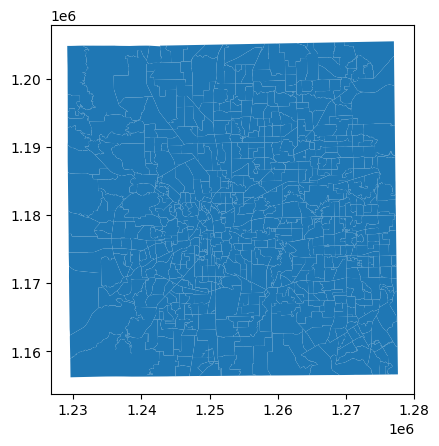

In [ ]:
# plot shapefile to check it looks right
vtd_shapefile.plot()

In [ ]:
# looks good! now, let's join with merged_df to get election results and demographics
vtd_shapefile = vtd_shapefile.merge(merged_df, left_on='VTD', right_on='VTD', how='inner')

<Axes: >

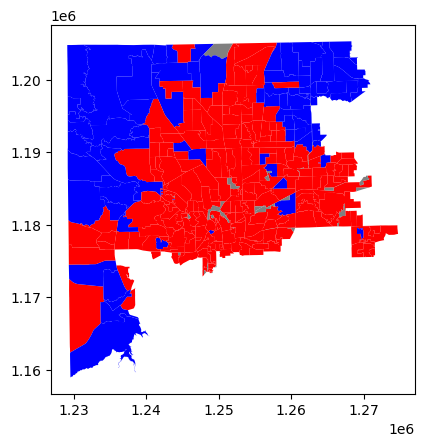

In [ ]:
# plot winners by precinct to ensure it looks right
color_map = {
    'Taylor Rehmet': 'red',
    'Leigh Wambsganss': 'blue',
    'Tie': 'gray'
}

colors = vtd_shapefile['Winner'].map(color_map)
vtd_shapefile.plot(color=colors)

In [ ]:
shapefile_nonwhite = vtd_shapefile[vtd_shapefile['pct_nonwhite'] > 0.5]

In [ ]:
# export vtdshapefile to geojson to use in datawrapper
vtd_shapefile.to_file('district9_results.geojson', driver='GeoJSON')

In [ ]:
vtd_geojson = gpd.read_file('district9_results.geojson')

In [ ]:
# check the projection/coordinate 
# reproject to WGS-84 (EPSG:4326)
vtd_geojson = vtd_geojson.to_crs(epsg=4326)
vtd_geojson.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# export as a geojson so i can use it in datawrapper
vtd_shapefile.to_file('district9_results.geojson', driver='GeoJSON')